<a href="https://colab.research.google.com/github/pragati72448/flight_booking_price_prediction/blob/main/Flight_Booking_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Objective:**

The objective of this project is to conduct a comprehensive analysis of a flight booking dataset obtained from a platform used for booking flight tickets. This thorough study of the data aims to uncover valuable insights that will be immensely beneficial to passengers, airlines, and other stakeholders in the aviation industry.

To achieve this, we will employ various techniques including Exploratory Data Analysis (EDA), statistical methods, and machine learning algorithms. Additionally, we will incorporate SHAP (SHapley Additive exPlanations) visualizations to enhance our understanding of the model's outputs and interpret the importance of different features in influencing booking behaviors.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

Importing the dataset (.csv) into pandas

The dataset comprises of 300153 rows and 12 columns. Out of which one of them is to be removed. These are listed below.

*   unnamed - might be an index number.
*   airline - The various airline companies
*   flight - The flight code
*   source_city - The source city of a particular flight
*   departure_time - departure time of the flight
*   stops - number of stops a particular flight takes
*   arrival_time - the arrival time of a particular flight
*   destination_city - the destination city a particular flight lands on
*   class - the class of the flight (i.e., economy,
  business or first class)
*   duration - the duration of the flight
* price - the price of the flight chosen













To ensure computational efficiency and focus on model interpretability, I worked with a representative subset of 10,000 rows from the dataset. This allowed me to leverage SHAP for detailed feature importance analysis and gain insights into the model's predictions.

In [ ]:
data = pd.read_csv('/content/Flight_Booking.csv')[:10000]
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


The sliced dataset consists of 10,000 rows and 12 columns

In [ ]:
data.shape

(10000, 12)

In [ ]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
9995,9995,Air_India,AI-506,Delhi,Morning,zero,Afternoon,Bangalore,Economy,2.75,1,7425
9996,9996,Air_India,AI-502,Delhi,Afternoon,zero,Evening,Bangalore,Economy,2.75,1,7425
9997,9997,Air_India,AI-504,Delhi,Night,zero,Late_Night,Bangalore,Economy,2.92,1,7425
9998,9998,AirAsia,I5-548,Delhi,Early_Morning,one,Afternoon,Bangalore,Economy,7.58,1,7423
9999,9999,AirAsia,I5-764,Delhi,Early_Morning,one,Afternoon,Bangalore,Economy,10.33,1,7423


The code below determined how many non null values are there. Since there are no null values, we don't need to fill them by means of mean, median or mode.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   airline           10000 non-null  object 
 2   flight            10000 non-null  object 
 3   source_city       10000 non-null  object 
 4   departure_time    10000 non-null  object 
 5   stops             10000 non-null  object 
 6   arrival_time      10000 non-null  object 
 7   destination_city  10000 non-null  object 
 8   class             10000 non-null  object 
 9   duration          10000 non-null  float64
 10  days_left         10000 non-null  int64  
 11  price             10000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


By dropping the "Unnamed: 0" column, we make our dataset more presentable as relevant data gets presented.

In [ ]:
data = data.drop(columns=["Unnamed: 0"])

The code below shows that "Unnamed: 0" column has been successfully removed and the shape of dataset is 10,000 rows and 11 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10000 non-null  object 
 1   flight            10000 non-null  object 
 2   source_city       10000 non-null  object 
 3   departure_time    10000 non-null  object 
 4   stops             10000 non-null  object 
 5   arrival_time      10000 non-null  object 
 6   destination_city  10000 non-null  object 
 7   class             10000 non-null  object 
 8   duration          10000 non-null  float64
 9   days_left         10000 non-null  int64  
 10  price             10000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 859.5+ KB


In [ ]:
data.shape

(10000, 11)

The code below describes the statistical aspects of the dataset. The dataset has 10,000 rows of duration, days_left and the price.

The mean of duration, days_left and price is out of 10,000 rows is 9.526, 25.871, and Rs. 6062.283 repectively.

Similarly, the Standard Deviation, minimum, 1st quartile (25%), second quartile (50%), the third quartile (75%) and the maximum/fourth quartile are all listed below.

In [ ]:
data.describe()

,duration,days_left,price
count,10000.000000,10000.000000,10000.000000
mean,9.526125,25.871100,6062.283100
std,7.047044,13.641888,3782.797158
min,2.000000,1.000000,2281.000000
25%,2.330000,14.000000,3102.000000
50%,7.670000,26.000000,5301.000000
75%,13.750000,38.000000,6737.000000
max,30.080000,49.000000,31260.000000


The code checks for the total null values, if present in the dataset, and calculates which column has null values, and how many of them. Since this dataset has no null values, the code shows zero null values.

In [ ]:
data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


To check for outliers, we use boxplot.

Text(0, 0.5, 'Values')

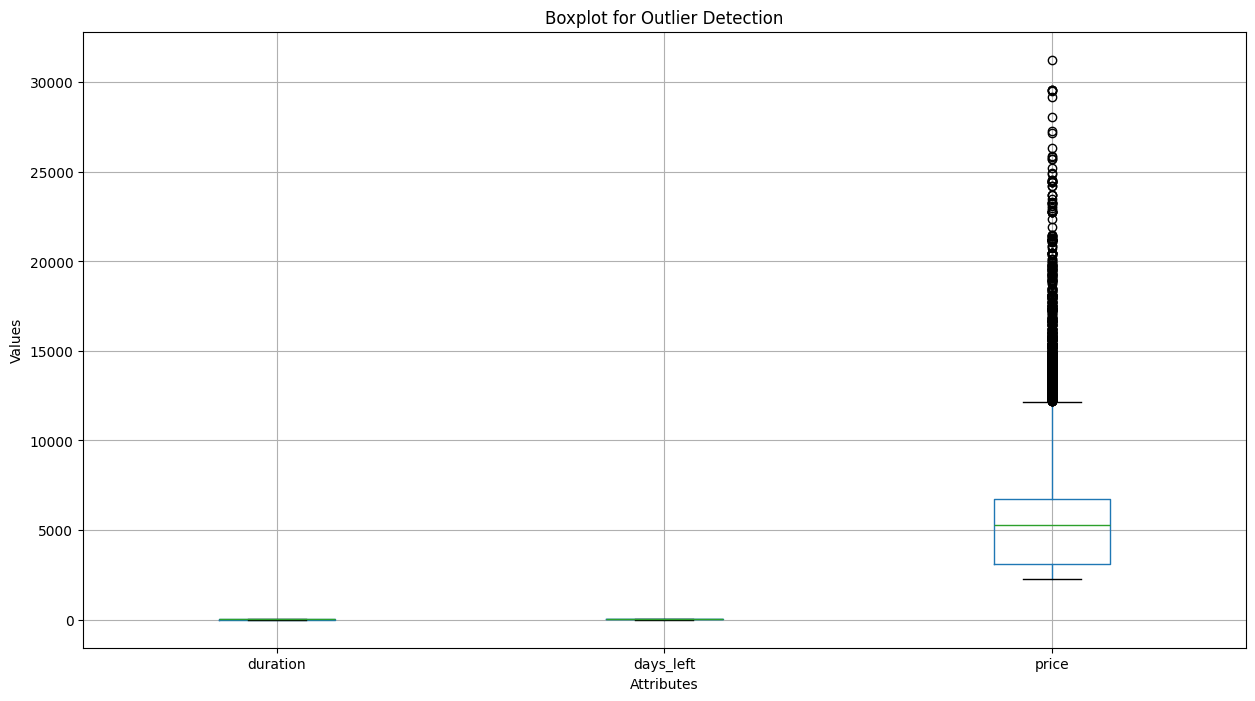

In [ ]:
# checking for outliers
plt.figure(figsize=(15,8))
data.boxplot()
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Attributes')
plt.ylabel('Values')

<Axes: xlabel='price', ylabel='Density'>

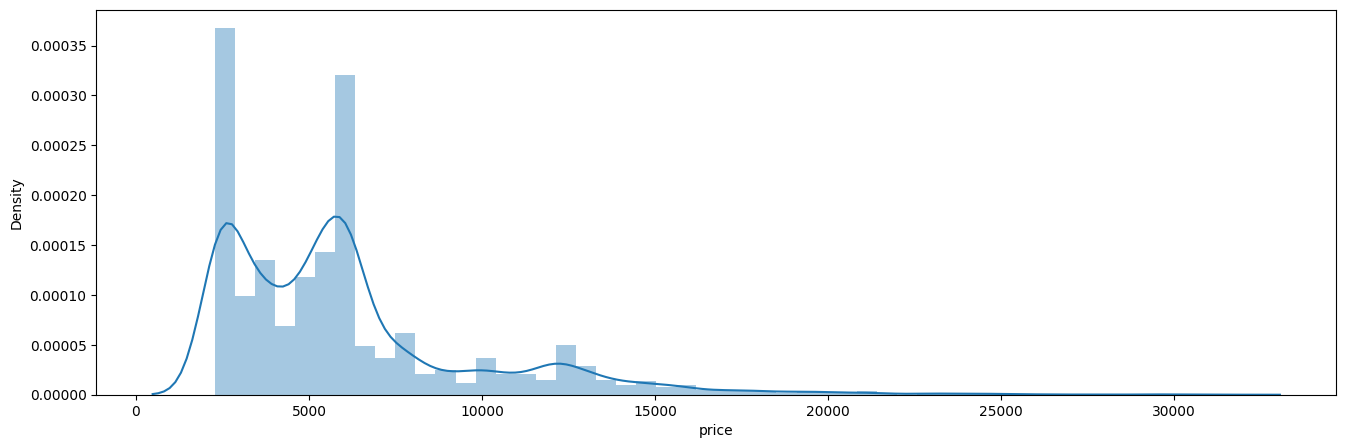

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(data['price'])

<Axes: ylabel='price'>

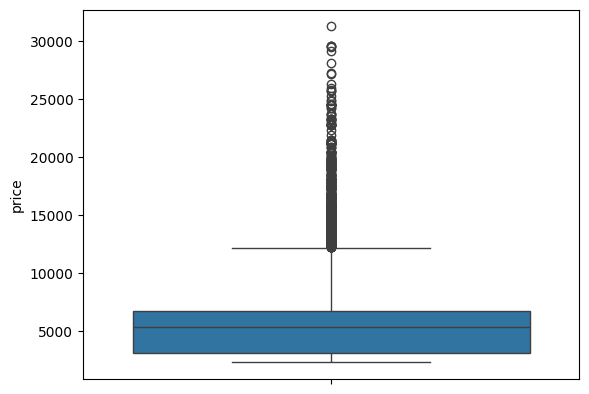

In [ ]:
sns.boxplot(data['price'])

Here, as you can see, I chose not to remove the identified outliers because they are likely influenced by various real-world factors, such as last-minute booking decisions and price variations between different airlines. Additionally, in practical scenarios, pricing differences across travel classes (e.g., economy, business, first class) play a significant role in creating variability. These factors contribute valuable information about the diversity of pricing behavior, and removing these outliers might result in the loss of meaningful insights into these dynamics. Therefore, I believe it is more appropriate to retain these data points.

The code below is to determine the variation of airlines and their cost. AirAsia seems to have the cheapest ride whereas Vistara and AirIndia have the most expensive rides.

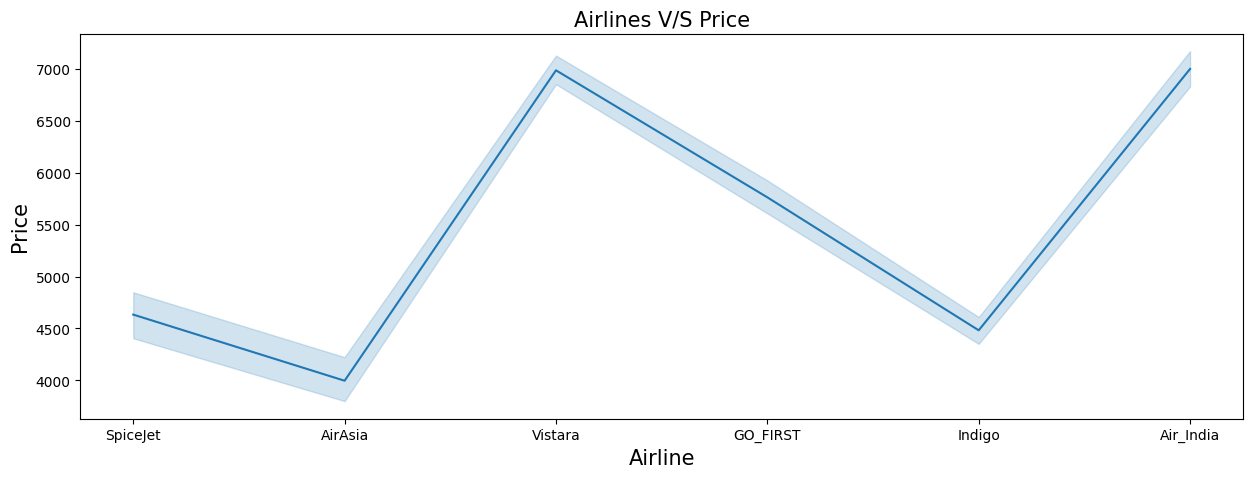

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x= data['airline'], y = data['price'])
plt.title('Airlines V/S Price', fontsize= 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

The code below shows the relationship between days left for departure and the ticket prices. Based on the output, we can determine that these two attributes have an inverse relationship. The less days left for departure shows a high ticket price and the planning in advance shows cheaper prices.

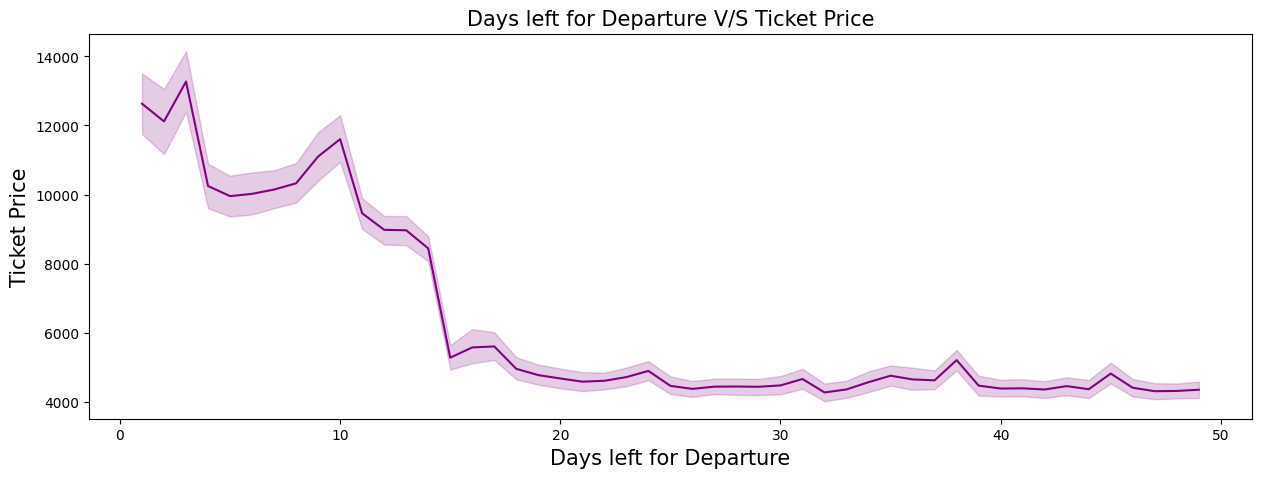

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x= data['days_left'], y = data['price'], color = 'purple')
plt.title('Days left for Departure V/S Ticket Price', fontsize = 15)
plt.xlabel('Days left for Departure', fontsize = 15)
plt.ylabel('Ticket Price', fontsize = 15)
plt.show()

The code below compares prices of different airlines and we can infer that Air Asia, Spicejet and Indigo airlines are the cheaper alternatives whereas Vistara, Air India and GOFirst are the more expensive alternatives

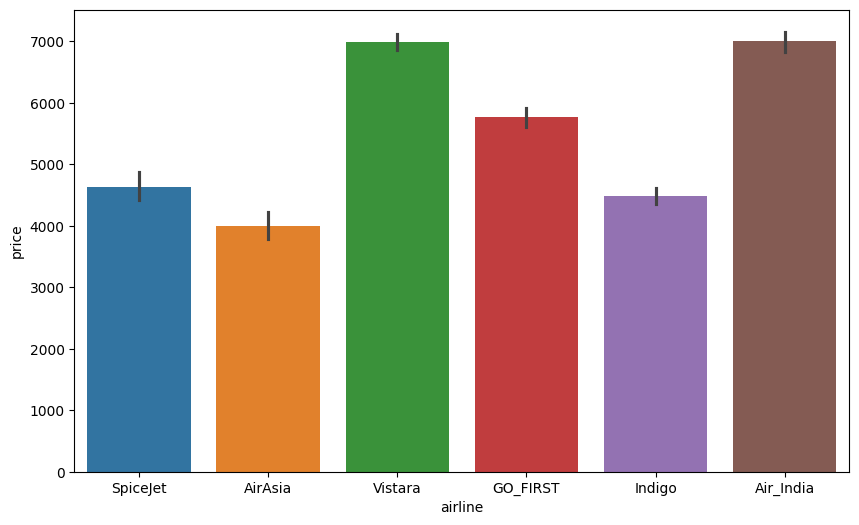

In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(x= data['airline'], y= data['price'], hue = data['airline'])
plt.show()

Here, the code below compares the prices of different classes of different airlines.

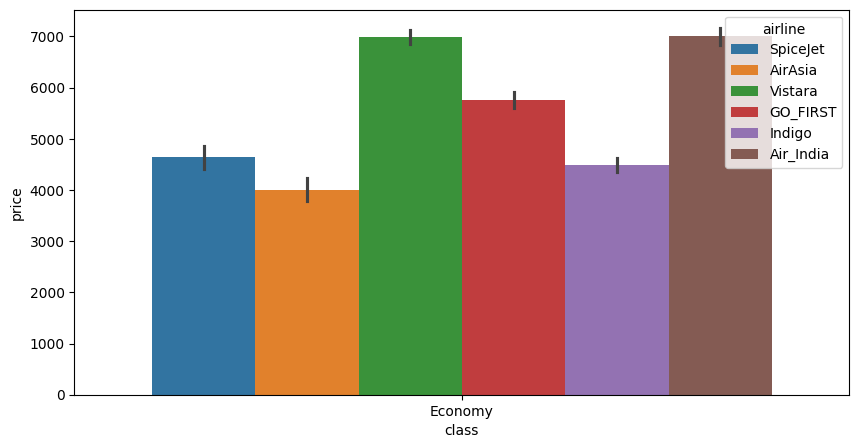

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(x = data['class'], y = data['price'], hue = data['airline'])
plt.show()

Since the dataset is sliced to the initial 10000 rows, we have the economy class present for us. The inference is the same as above code, Air Asia, Spicejet and Indigo airlines showing the cheaper price for economy class, whereas Vistara, GOFirst, and Air India being the pricier ones.

The code below shows the range of price of flights with source
and destination city according to
the days left.


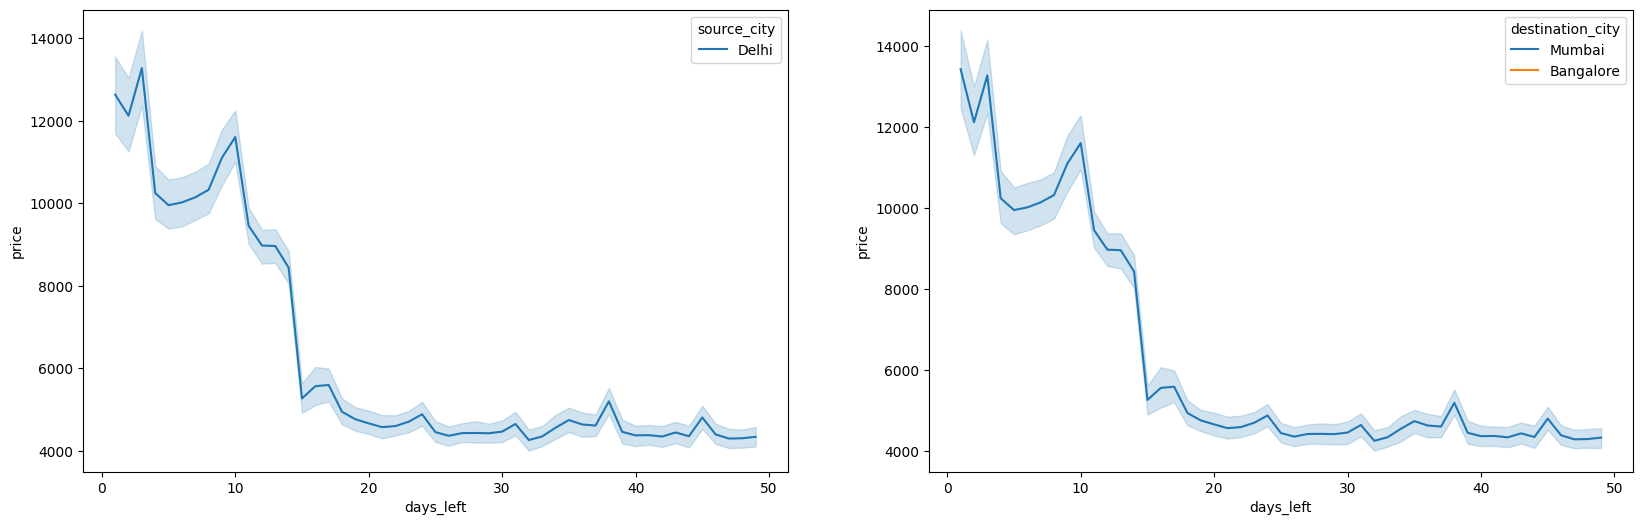

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (20,6))
sns.lineplot(x= data['days_left'], y = data['price'], ax = ax[0], hue = data['source_city'])
sns.lineplot(x= data['days_left'], y= data['price'], ax= ax[1], hue= data['destination_city'])
plt.show()

The graphs show that flight prices tend to decrease as the number of days left before the departure increases. This is likely because last-minute bookings are usually more expensive due to higher demand and limited availability. Small spikes in prices may occur closer to the date of travel, potentially due to holidays, festivals, or other high-demand periods when airlines increase prices in response to expected booking surges. The general downward trend suggests that booking flights earlier tends to result in lower prices.

The code below considers various vizualisation of categorical features using countplot

<Figure size 1500x1200 with 0 Axes>

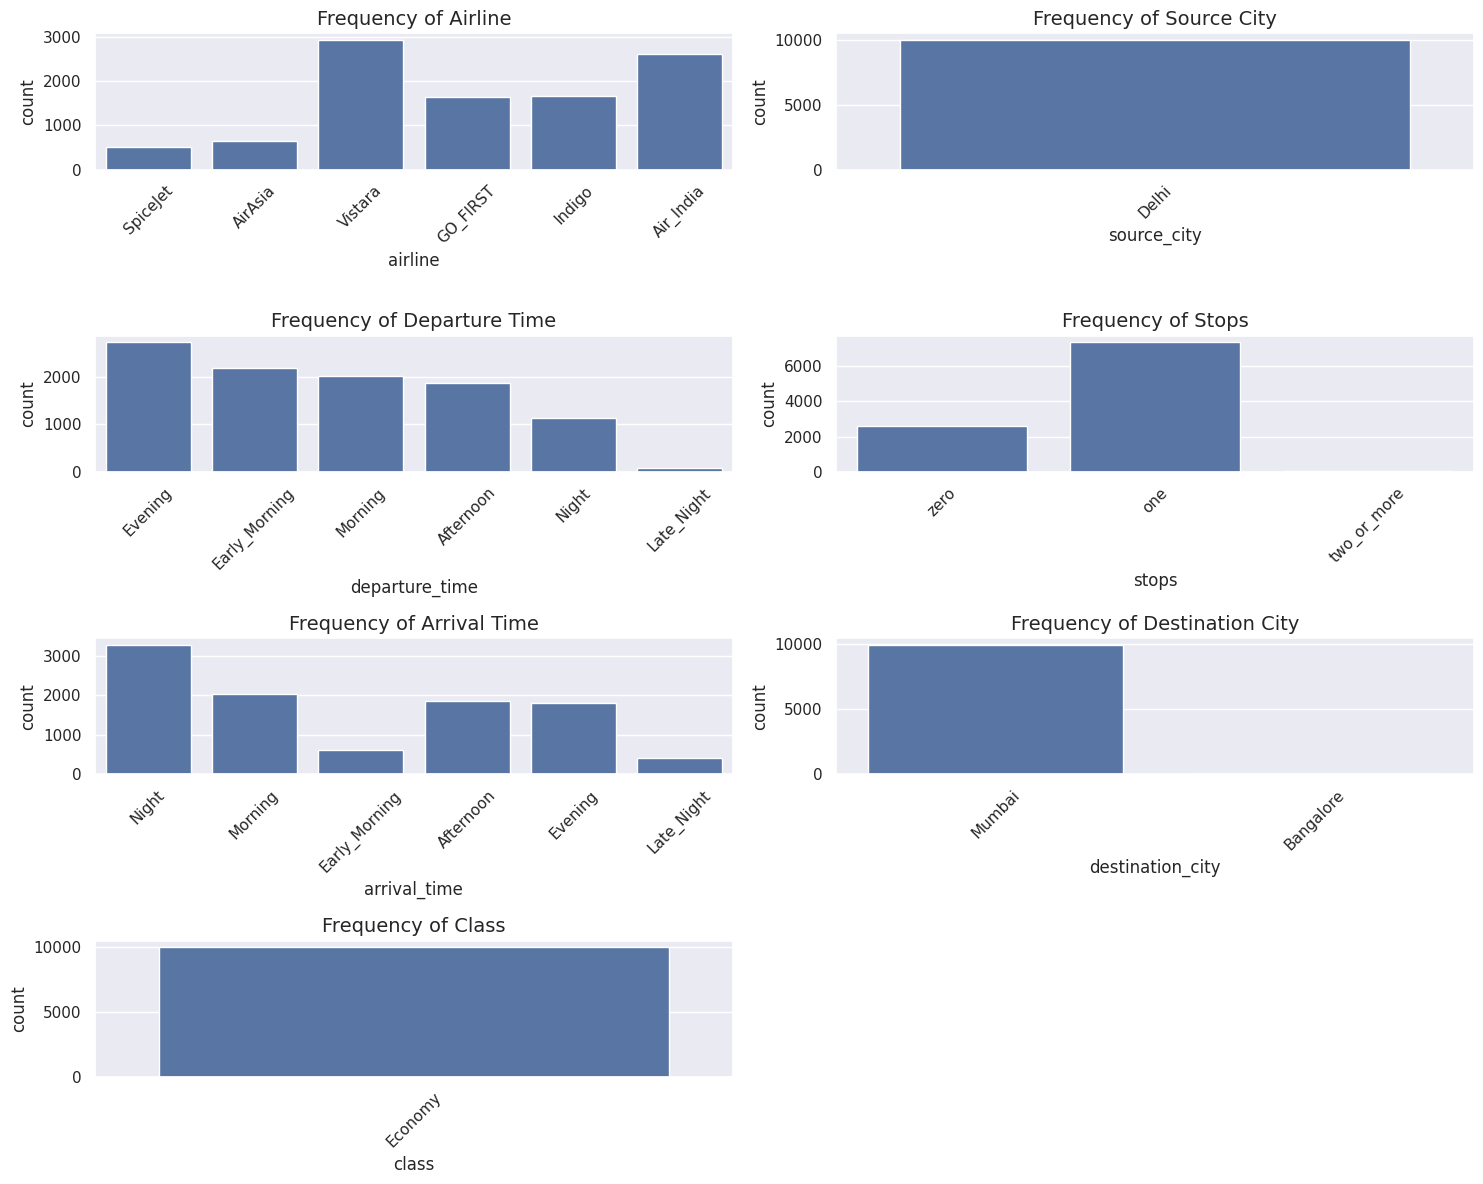

In [ ]:
plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

# Create plots and assign each plot to the respective axes
sns.countplot(x=data['airline'], ax=axes[0, 0])
axes[0, 0].set_title("Frequency of Airline", fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x=data['source_city'], ax=axes[0, 1])
axes[0, 1].set_title("Frequency of Source City", fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x=data['departure_time'], ax=axes[1, 0])
axes[1, 0].set_title("Frequency of Departure Time", fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x=data['stops'], ax=axes[1, 1])
axes[1, 1].set_title("Frequency of Stops", fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(x=data['arrival_time'], ax=axes[2, 0])
axes[2, 0].set_title("Frequency of Arrival Time", fontsize=14)
axes[2, 0].tick_params(axis='x', rotation=45)

sns.countplot(x=data['destination_city'], ax=axes[2, 1])
axes[2, 1].set_title("Frequency of Destination City", fontsize=14)
axes[2, 1].tick_params(axis='x', rotation=45)

sns.countplot(x=data['class'], ax=axes[3, 0])
axes[3, 0].set_title("Frequency of Class", fontsize=14)
axes[3, 0].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
axes[3, 1].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

The above graph shows that:

By the frequency of airlines, Vistara flies the most, followed by Air India, whereas Spicejet flies the least, second least flier becomes Air Asia.

Because the dataset is sliced, the source city and destination city are Delhi and Mumbai respectively.

Most flights depart from the source city in the evening, or early morning whereas very few flights depart late at night.

Most flights arrive to their destination by night or morning - afternoon. Based on the time the flight departed.

Most flights take one stop while some take zero stops to reach their destination.

All flights are economy class in this sliced dataset.

The below code is to perform label encoding to convert categorical variables into numerical format.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['airline']= le.fit_transform(data['airline'])
data['flight']= le.fit_transform(data['flight'])
data['source_city']= le.fit_transform(data['source_city'])
data['departure_time']= le.fit_transform(data['departure_time'])
data['stops']= le.fit_transform(data['stops'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['class']= le.fit_transform(data['class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10000 non-null  int64  
 1   flight            10000 non-null  int64  
 2   source_city       10000 non-null  int64  
 3   departure_time    10000 non-null  int64  
 4   stops             10000 non-null  int64  
 5   arrival_time      10000 non-null  int64  
 6   destination_city  10000 non-null  int64  
 7   class             10000 non-null  int64  
 8   duration          10000 non-null  float64
 9   days_left         10000 non-null  int64  
 10  price             10000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 859.5 KB


This is done so that we can perform feature selection.

As we performed label encoding here, now we can perform feature selection. This is done to improve the model's performance and reduce its complexity. Here, we chose VIF - Variance Inflation Factor to assess which attribute of the dataset shows multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
  if((data[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   5.366848
1            flight   6.929341
2       source_city        NaN
3    departure_time   2.750100
4             stops   2.202361
5      arrival_time   3.577775
6  destination_city  18.100284
7             class        NaN
8          duration   4.689265
9         days_left   4.653947


Since both class and source_city are uniform, their variance is zero, resulting in NaN values in the VIF calculation. Most features in the dataset show a VIF less than 6, indicating low multicollinearity. However, I chose to retain airline, flight, and destination_city despite their high VIF values. This is not due to high collinearity but rather because the dataset has been sliced, limiting the diversity of these features. For instance, the above graphs show that destination_city is limited to only Mumbai in this subset, but in real-world scenarios, flights operate to a variety of destinations. The destination_city remains essential to determining flight prices because, without it, predicting the cost of a flight would not be feasible.

The code below shows that we are plotting the correlation
graph to see the
correlation between
features and dependent
variable.

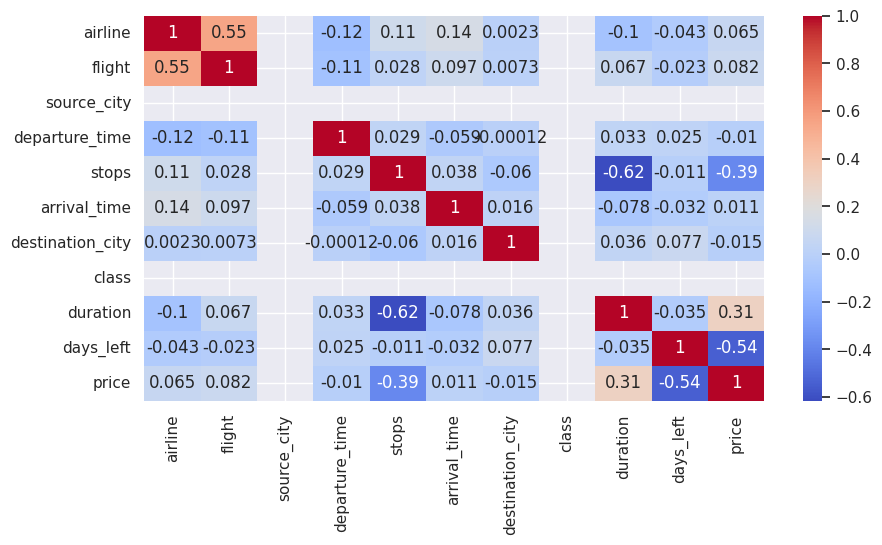

In [ ]:
#Ensuring the data has only numeric columns
numeric_data = data.select_dtypes(include=['number'])
numeric_data= numeric_data.fillna(0)
#creating the heatmap
plt.figure(figsize= (10,5))
sns.heatmap(numeric_data.corr(), annot= True, cmap="coolwarm")
plt.show()

The correlation values for class and source_city are not displayed because these attributes lack sufficient variation to establish a meaningful correlation. On the other hand, airline and flight show a moderate correlation with a value of 0.55, indicating a significant relationship between them. Similarly, the correlations of other attributes with one another are shown above for further analysis.

Applying Machine Learning Models:

To determine the most effective predictive model, I employed Linear Regression, Decision Trees, and Random Forest. By comparing their performance on relevant metrics, I can identify the model best suited for this particular dataset and task

In [ ]:
X = data.drop(columns= ['price'])
y = data['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual_Value", "Predicted_Value"])
print(difference)

      Actual_Value  Predicted_Value
0           3100.0      3118.865200
1           2410.0      3478.986941
2           6585.0      5560.574385
3           3519.0      7122.607147
4           3835.0      7751.978068
...            ...              ...
1995        2410.0      2386.429211
1996        6296.0      5011.705895
1997        6296.0      5188.440061
1998       16665.0      9231.036653
1999        4967.0      5159.272687

[2000 rows x 2 columns]


In [ ]:
from sklearn.metrics import r2_score
print("The r2 Score using Linear Regression is : " ,r2_score(y_test, y_pred))
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("The mean absolute error (MAE) using Linear Regression is : " ,mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
mean_abs_per_error = mean_absolute_percentage_error(y_test, y_pred)
print("The mean absolute percentage error (MAPE) using Linear Regression is : " ,mean_abs_per_error)
mean_sq_error= metrics.mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) using Linear Regression is : " ,mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) using Linear Regression is : " ,root_mean_sq_error)

The r2 Score using Linear Regression is :  0.46896318587698416
The mean absolute error (MAE) using Linear Regression is :  2040.2046750385425
The mean absolute percentage error (MAPE) using Linear Regression is :  0.4047096040868526
The mean squared error (MSE) using Linear Regression is :  7647848.058505104
The root mean squared error (RMSE) using Linear Regression is :  2765.4742917816293


Plotting the graph of actual
and predicted price of flight


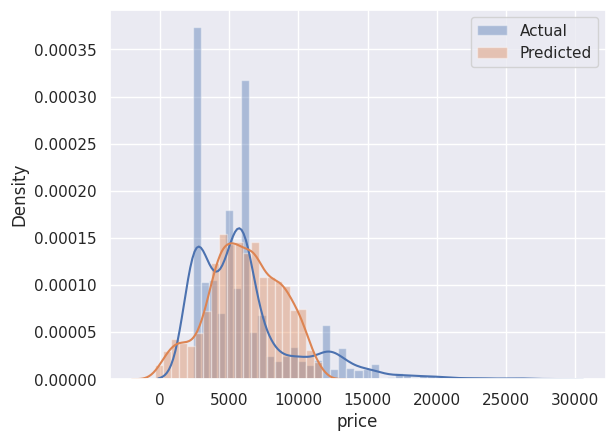

In [ ]:
sns.distplot(y_test, label = "Actual")
sns.distplot(y_pred, label = "Predicted")
plt.legend()

The model seems to slightly overestimate the density of the second (higher price) peak. The predicted distribution is a bit taller and narrower than the actual distribution in this region. This indicates the model might be predicting slightly lower prices than the actual prices for some of the higher-priced items.

Below, we apply Decision Tree to compare it with Linear Regression Model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("The r2 score using Decision Tree is : ",r2_score(y_test, y_pred))
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("The mean absolute error (MAE) using Decision Tree is : ", mean_abs_error)
mean_abs_per_error = mean_abs_per_error = mean_absolute_percentage_error(y_test, y_pred)
print("The mean absolute percentage error (MAPE) using Decision Tree is : " , mean_abs_per_error)
mean_sq_error= metrics.mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) using Decision Tree is : " ,mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) using Decision Tree is : " , root_mean_sq_error)

The r2 score using Decision Tree is :  0.711236093095607
The mean absolute error (MAE) using Decision Tree is :  697.1135
The mean absolute percentage error (MAPE) using Decision Tree is :  0.09360429909864411
The mean squared error (MSE) using Decision Tree is :  4158699.4085
The root mean squared error (RMSE) using Decision Tree is :  2039.2889467900325


A desirable model exhibits an R² score approaching 1 and minimal RMSE and MAPE values. The Decision Tree model (R² = 0.7, RMSE = 2039.288, MAPE = 0.0936) shows a marked improvement over Linear Regression (R² = 0.4, RMSE = 2765.474, MAPE = 0.4047), with a considerably higher R² and substantially lower RMSE and MAPE. This indicates a significantly better fit to the data for the Decision Tree.

Next, we apply Random Forest algorithm.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print("The r2 score using Random Forest is : ",r2_score(y_test, y_pred))
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("The mean absolute error (MAE) Random Forest is : ", mean_abs_error)
mean_abs_per_error = mean_abs_per_error = mean_absolute_percentage_error(y_test, y_pred)
print("The mean absolute percentage error (MAPE) using Random Forest is : " , mean_abs_per_error)
mean_sq_error= metrics.mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) using Random Forest is : " ,mean_sq_error)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) using Random Forest is : " , root_mean_sq_error)

The r2 score using Random Forest is :  0.8552631526986447
The mean absolute error (MAE) Random Forest is :  598.1224500000001
The mean absolute percentage error (MAPE) using Random Forest is :  0.08367501277580845
The mean squared error (MSE) using Random Forest is :  2084460.7891373
The root mean squared error (RMSE) using Random Forest is :  1443.7661822945224


As a higher R² (closer to 1) and lower RMSE and MAPE indicate better model performance, the Random Forest model (R² = 0.8, RMSE = 1443.7661, MAPE = 0.0836) is superior to the Decision Tree model (R² = 0.7, RMSE = 2039.288, MAPE = 0.0936). This improvement across all metrics confirms that Random Forest provides the best predictive accuracy among the three models tested: Linear Regression, Decision Tree, and Random Forest.

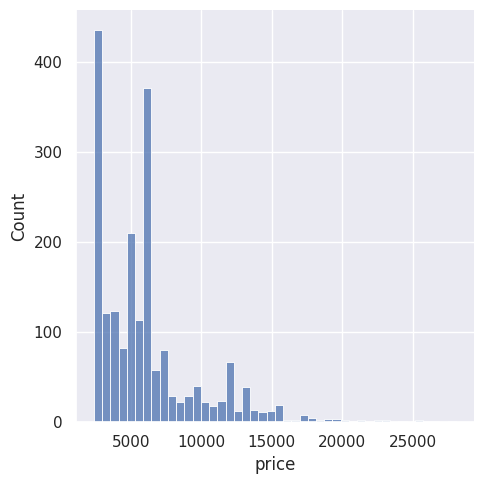

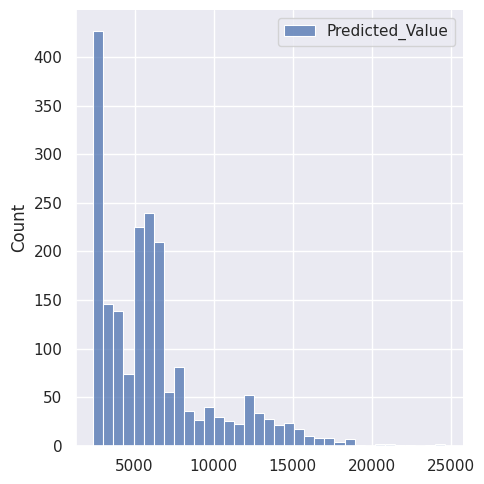

In [ ]:
sns.displot(y_test, label = "Actual_Value")
sns.displot(y_pred, label = "Predicted_Value")
plt.legend()

The histogram represents the distribution of predicted flight prices compared to actual prices.

The majority of prices fall in the lower ranges (below ₹10,000), which aligns with the dominance of lower-priced flights in the dataset.
The peaks around ₹4,000-₹5,000 and ₹7,000-₹10,000 suggest that the model has captured these common price ranges reasonably well.
The presence of higher price values in the tail (above ₹20,000) indicates that the model may occasionally predict or encounter higher prices, but these are relatively rare.

Cross-validation is a technique used to evaluate machine learning (ML) models by training and testing them on different subsets of data. It's used to estimate how well a model will perform on new data, and to identify problems like overfitting.

Here I chose to use K-fold cross validation, and
K-fold cross-validation was used to assess model performance and prevent overfitting. This technique divides the dataset into k subsets, trains the model k times using k-1 subsets for training and the remaining subset for validation, and averages the performance across all folds.

In [ ]:
from sklearn.model_selection import cross_val_score
cv_folds = 5

linear_regression_score = cross_val_score(lr, X, y, cv= cv_folds, scoring = 'r2')
print('The linear regression R-Squared scores : ', linear_regression_score)
print('The linear regression Mean R-Squared scores : ', linear_regression_score.mean())

decision_tree_score = cross_val_score(dt, X, y, cv = cv_folds, scoring = 'r2')
print('The decision tree R-Squared scores : ', decision_tree_score)
print('The decision tree Mean R-Squared scores : ', decision_tree_score.mean())

random_forest_score = cross_val_score(rfr, X, y, cv = cv_folds, scoring = 'r2')
print('The random forest R-Squared scores : ', random_forest_score)
print('The random forest Mean R-Squared scores : ', random_forest_score.mean())

The linear regression R-Squared scores :  [-0.5893026   0.03259204 -0.61699467  0.23264237 -2.09379865]
The linear regression Mean R-Squared scores :  -0.6069723044626418
The decision tree R-Squared scores :  [-0.14953165  0.35925128  0.73942842  0.23418613  0.6879507 ]
The decision tree Mean R-Squared scores :  0.3742569755929063
The random forest R-Squared scores :  [0.38953913 0.44033353 0.79715341 0.70411199 0.72603348]
The random forest Mean R-Squared scores :  0.6114343072685953


From the above outputs, we can conclude that
out of the three machine learning algorithms, Random Forest held out with cross validation test the best because it gave consistent postive results as compared to decision trees and linear regression model.

SHAP (SHapley Additive exPlanations) is an open-source algorithm that helps explain the output of machine learning models. It uses Shapley values, a game theory concept, to calculate the importance of each feature in a model.
SHAP assigns an importance value to each feature in a model.
It shows how each feature affects the final prediction.
It also shows the significance of each feature compared to others.
SHAP values can be visualized in various ways, such as bar charts or summary plots.

And here, I decided to use Global Summary Plot, Bar Plot, Dependence Plot, and Waterfall plot.

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rfr)
shap_values = explainer.shap_values(x_test)

**Implementing SHAP**

To visualize SHAP values, we use shap.initjs().

Since Random Forest emerged as the most superior model, it was selected for SHAP analysis.

Why Random Forest?

Best R² Scores: Random Forest presented the highest R² scores, demonstrating its ability to explain a significant portion of the variance in the target variable.

Robust Against Outliers: Unlike Linear Regression, Random Forest uses decision trees, making it less sensitive to outliers and more robust in handling noisy data.

Captures Non-Linear Relationships: Random Forest excels at capturing complex, non-linear relationships, which is critical for features like days_left, duration, and stops.

Reduced Overfitting: Compared to Decision Trees, Random Forest combines predictions from multiple trees through bagging, reducing overfitting and improving generalization to unseen data.

The code below, is to fetch the global summary plot.

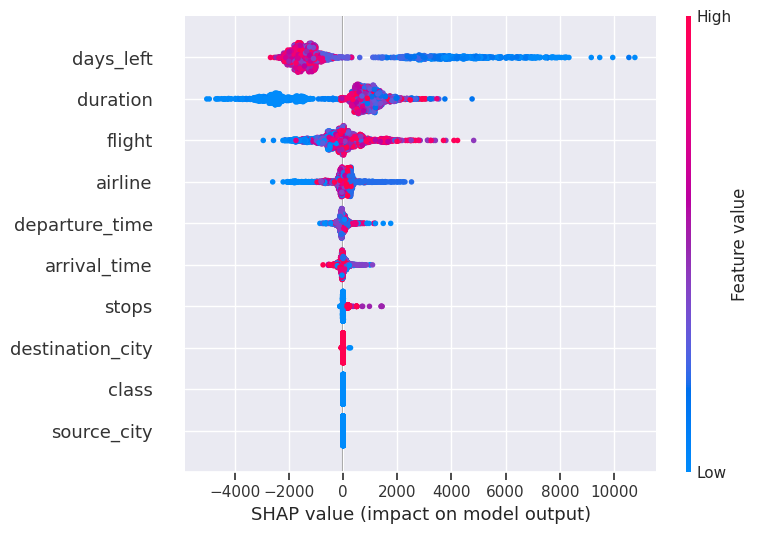

In [ ]:
#Global Summary plot shows all important features across all predictions
x_test_data = pd.DataFrame(x_test, columns=['airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class', 'duration', 'days_left'])
shap.summary_plot(shap_values, x_test_data)

This plot provides an overview of feature importance across entire dataset. The key components of this graph are:

* Feature Order - (y-axis): Ranked by the overall importance of the features of the model.
days_left and duration are the most impactful feature, followed by flight and airline.

* SHAP Values - (x-axis): The horizontal spread shows the magnitude of each feature's contribution to prediction. A wider spread means stronger impact, either positive or negative, on predictions.

The colors red and blue show actual feature value for each instance. Red being positive whereas blue being negative.

This plot can be interpreted as:

* **days_left** :
 High (red) days_left (many days left before departure) leads to strongly negative SHAP values (lower prices).
Low (blue) days_left (closer to departure) leads to positive SHAP values (higher prices).

* **duration** : Longer flights (red) typically increase ticket prices, while shorter flights (blue) reduce them.

**stops**, **flight**, and **airline** also significantly influence predictions, but their impact is less consistent compared to days_left and duration.



  



The code below is to fetch the bar plot.

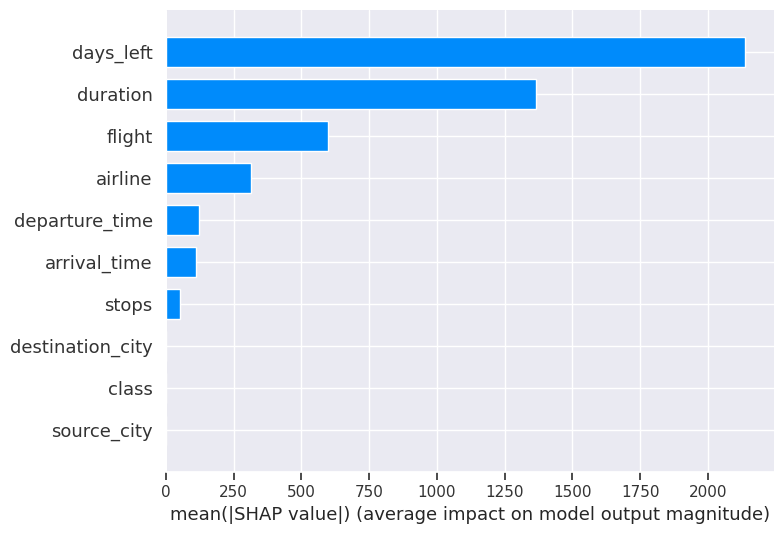

In [ ]:
#simpler version of summary plot, the bar plot
shap.summary_plot(shap_values, x_test_data, plot_type="bar")

This Shap plot is used to determine the highest influencing features, the top features are **days_left** and **duration** and we also see that **airline** and **flight** are also contributing to the impact of model output, but not as much as days_left and duration.

The below code is to fetch the dependence plot

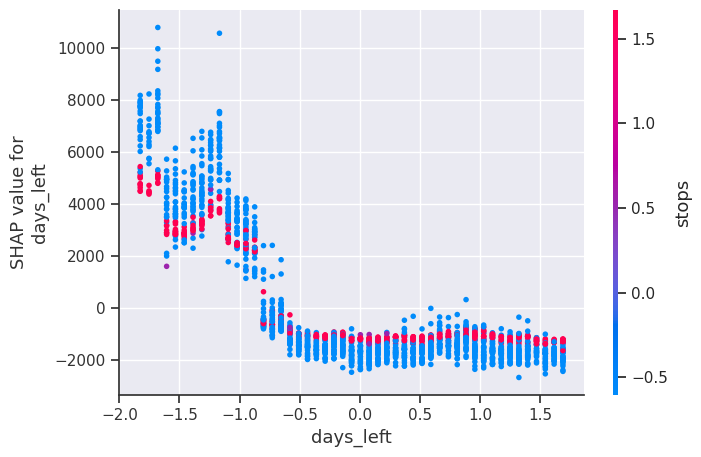

In [ ]:
#dependence plot of days_left
shap.dependence_plot('days_left', shap_values, x_test_data)

General Trend:

When days_left is lower (closer to -2), SHAP values are higher, indicating that fewer days left before the flight increases the ticket price significantly. This makes sense because last-minute bookings often cost more.
As days_left increases (closer to 1.5), SHAP values drop, meaning ticket prices decrease when you book well in advance.

Effect of Stops:

Color coding suggests that stops affects the impact of days_left:
Red dots (more stops) cluster at higher SHAP values, implying flights with more stops are generally more expensive, especially closer to the departure date.
Purple dots (fewer stops) cluster at lower SHAP values, indicating that non-stop flights may become cheaper or less impacted by the days_left feature.

So, this basically means that
* Booking early saves money. The earlier we book, i.e, the higher the days_left, lower the ticket price. The impact diminishes as days left decreases.
* Stops add complexity. The number of stops interacting with days_left, those flights are differently priced based on proximity to departure date.

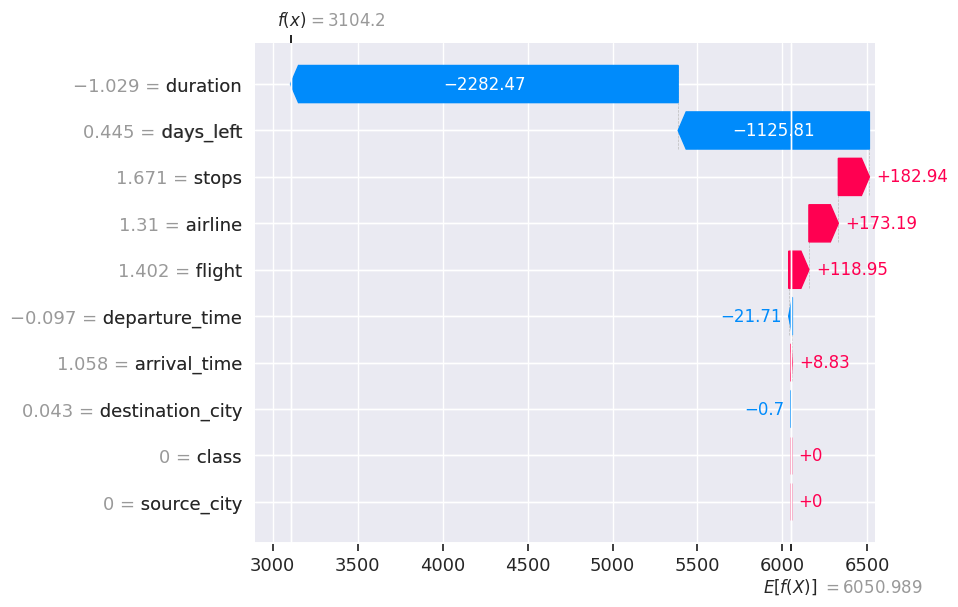

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=x_test_data.iloc[0]))

This plot explains how each feature contributes to a single prediction.

Key Components:

Base Value (on the far right):

E[f(x)] = 6044.251 is the average prediction of the model (mean ticket price across the dataset).
The model starts with this baseline value.

Feature Contributions:

Each bar shows how a feature adds or subtracts from the baseline to arrive at the final prediction (f(x) = 3106.3).

Blue bars (negative impact): Features that reduce the prediction.
Example: duration = -1.029 decreases the predicted price by -2255.33.

Red bars (positive impact): Features that increase the prediction.
Example: airline = 1.31 increases the predicted price by +170.54.

Final Prediction (f(x)):

This is the model’s predicted value for this specific observation (3106.3).
Interpretation:
The duration of the flight and the days left (closer to departure) are the two strongest contributors to reducing this specific ticket’s price.
Airline, stops, and flight type are positively influencing the price.
Features like class, source_city, and destination_city have no impact on this prediction in this instance.

***************************
## Conclusion

The primary goal of this project was to predict flight booking prices using machine learning. By analyzing key features such as `days_left`, `duration`, and `airline`, we successfully developed a model that provides reliable predictions with an R² score of **0.61**.

### Key Findings
- Our analysis revealed that **'days_left'** and **'duration'** were the most influential features affecting flight prices, as demonstrated by SHAP analysis.
- The Random Forest model outperformed other models, achieving a balanced trade-off between accuracy and interpretability.

### Limitations
- The dataset was limited to **10,000 rows** due to computational constraints.
- The exclusion of business and first-class flights may restrict the generalizability of the model to other travel classes.

### Future Work
To improve and expand the scope of this project, the following steps can be considered:
1. **Expand the dataset** to include other travel classes (e.g., business and first-class).
2. Explore additional features, such as ticket purchase platforms or promotional pricing data.
3. Deploy the model as a web application using **Flask** or **FastAPI** for real-time predictions.

---

This project demonstrates the potential of machine learning in solving real-world problems and highlights the importance of explainable AI in providing actionable insights.

